<style type="text/css">
    ol { list-style-type: upper-alpha; }
</style>

<center> <img src=https://i.imgur.com/0TSSaqL.png width="550"> </center>

<center> <h3> Module 5: Machine Learning 1</h3> </center>
<center> <h4> Ejemplos</h4> </center>

# Ejemplo Iris

In [ ]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


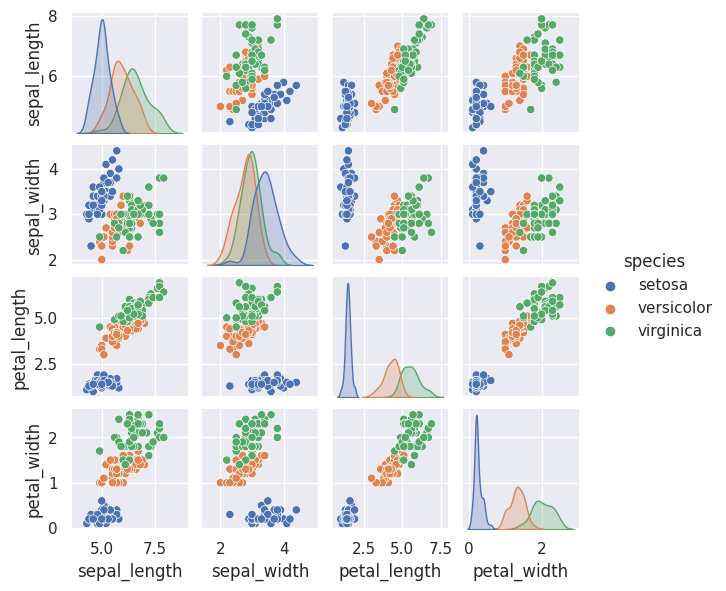

In [ ]:
%matplotlib inline
import seaborn as sns; sns.set()
sns.pairplot(iris, hue='species', size=1.5);

In [ ]:
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [ ]:
y_iris = iris['species']
y_iris.shape

(150,)

# Supervised learning example: Simple linear regression

As an example of this process, let's consider a simple linear regression—that is, the common case of fitting a line to (x,y)
 data. We will use the following simple data for our regression example:

[3.74540119 9.50714306 7.31993942 5.98658484 1.5601864  1.5599452
 0.58083612 8.66176146 6.01115012 7.08072578 0.20584494 9.69909852
 8.32442641 2.12339111 1.81824967 1.8340451  3.04242243 5.24756432
 4.31945019 2.9122914  6.11852895 1.39493861 2.92144649 3.66361843
 4.56069984 7.85175961 1.99673782 5.14234438 5.92414569 0.46450413
 6.07544852 1.70524124 0.65051593 9.48885537 9.65632033 8.08397348
 3.04613769 0.97672114 6.84233027 4.40152494 1.22038235 4.9517691
 0.34388521 9.09320402 2.58779982 6.62522284 3.11711076 5.20068021
 5.46710279 1.84854456]
[ 7.22926896 18.18565441 13.52423055 10.67206599  0.64185082  1.4000462
 -0.29896653 17.38064514 11.36591852 11.3984114  -0.26422614 18.01311476
 14.97193082  3.8584585   3.66749887  3.59937032  4.24562734  9.18591626
  7.9701638   5.80012793 10.75788366  1.60421824  3.736558    5.13103024
  8.93392551 16.05975926  2.92146552 10.28822167 11.2099274  -0.7161115
 11.51229264  3.94851904  0.26520582 19.5423544  15.69289556 15.98984947
  5.17

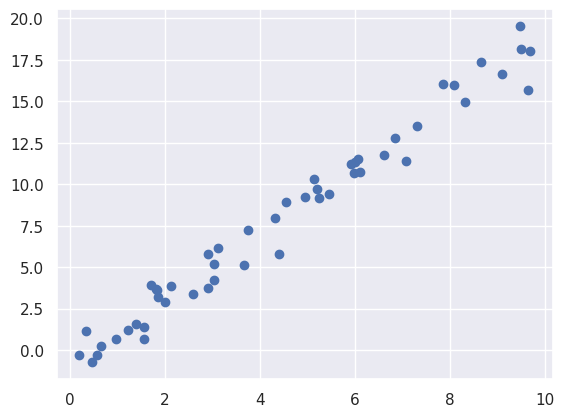

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
print(x)
print(y)
plt.scatter(x, y);

## 1. Choose a class of model
In Scikit-Learn, every class of model is represented by a Python class. So, for example, if we would like to compute a simple linear regression model, we can import the linear regression class.

Note that other more general linear regression models exist as well; you can read more about them in the sklearn.linear_model module documentation.

In [ ]:
from sklearn.linear_model import LinearRegression

## 2. Choose model hyperparameters

An important point is that a class of model is not the same as an instance of a model.

Once we have decided on our model class, there are still some options open to us. Depending on the model class we are working with, we might need to answer one or more questions like the following:

Would we like to fit for the offset (i.e., y-intercept)?
Would we like the model to be normalized?
Would we like to preprocess our features to add model flexibility?
What degree of regularization would we like to use in our model?
How many model components would we like to use?
These are examples of the important choices that must be made once the model class is selected. These choices are often represented as hyperparameters, or parameters that must be set before the model is fit to data. In Scikit-Learn, hyperparameters are chosen by passing values at model instantiation. We will explore how you can quantitatively motivate the choice of hyperparameters in Hyperparameters and Model Validation.

For our linear regression example, we can instantiate the LinearRegression class and specify that we would like to fit the intercept using the fit_intercept hyperparameter.

Keep in mind that when the model is instantiated, the only action is the storing of these hyperparameter values. In particular, we have not yet applied the model to any data: the Scikit-Learn API makes very clear the distinction between choice of model and application of model to data.

In [ ]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression()

## 3. Arrange data into a features matrix and target vector

Previously we detailed the Scikit-Learn data representation, which requires a two-dimensional features matrix and a one-dimensional target array. Here our target variable y is already in the correct form (a length-n_samples array), but we need to massage the data x to make it a matrix of size [n_samples, n_features]. In this case, this amounts to a simple reshaping of the one-dimensional array:

In [ ]:
X = x[:, np.newaxis]
X.shape

(50, 1)

## 4. Fit the model to your data

Now it is time to apply our model to data. This can be done with the fit() method of the model:

In [ ]:
model.fit(X, y)

LinearRegression()

This fit() command causes a number of model-dependent internal computations to take place, and the results of these computations are stored in model-specific attributes that the user can explore. In Scikit-Learn, by convention all model parameters that were learned during the fit() process have trailing underscores; for example in this linear model, we have the following:

In [ ]:
model.coef_

array([1.9776566])

In [ ]:
model.intercept_

-0.9033107255311146

These two parameters represent the slope and intercept of the simple linear fit to the data. Comparing to the data definition, we see that they are very close to the input slope of 2 and intercept of -1.

One question that frequently comes up regards the uncertainty in such internal model parameters. In general, Scikit-Learn does not provide tools to draw conclusions from internal model parameters themselves: interpreting model parameters is much more a statistical modeling question than a machine learning question. Machine learning rather focuses on what the model predicts. If you would like to dive into the meaning of fit parameters within the model, other tools are available, including the Statsmodels Python package.

## 5. Predict labels for unknown data

Once the model is trained, the main task of supervised machine learning is to evaluate it based on what it says about new data that was not part of the training set. In Scikit-Learn, this can be done using the predict() method. For the sake of this example, our "new data" will be a grid of x values, and we will ask what y values the model predicts:

In [ ]:
xfit = np.linspace(-1, 11)

As before, we need to coerce these x values into a [n_samples, n_features] features matrix, after which we can feed it to the model:

In [ ]:
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

Finally, let's visualize the results by plotting first the raw data, and then this model fit:

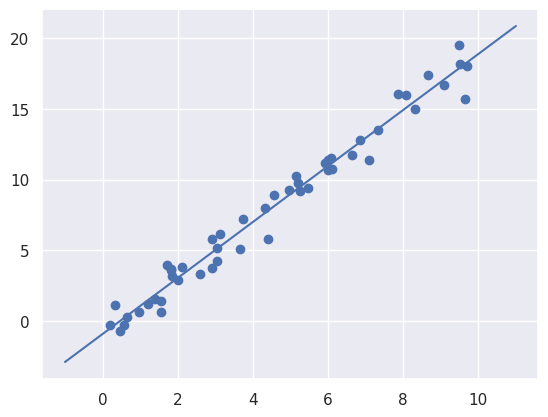

In [ ]:
plt.scatter(x, y)
plt.plot(xfit, yfit);

# Regresión Lineal

Los modelos de regresión lineal son métodos con base estadística que nos permiten estimar la relación de dependencia lineal entre una variable dependiente y con un conjunto de n de variables independientes x1, x2 ,… , xn.

In [ ]:
# Cargar Librerías

from sklearn.datasets import fetch_california_housing
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

A continuación, cargamos el dataset. Además, mostramos una breve explicación del conjunto de datos con el atributo DESCR.

In [ ]:
# Generar datos para el problema de regresión lineal
california_housing = fetch_california_housing(as_frame=True)

# Descripción del dataset

print(california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [ ]:
# Vamos a explorar el dataset
dataset = california_housing.frame
dataset.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422

In [ ]:
california_housing.frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [ ]:
california_housing.data.describe()

MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude  
count  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704  
std       10.386050      2.135952      2.003532  
min        0.692308     32.540000   -124.350000  
25%        2.429741     33.930000   -121.800000  
50%        2.818116     34.260000   -118.490000  
75%        3.282261     37.710000   -118.010000  
max     1243.333333     41.950000   -114.310000

Otra forma de explorar los datos es mediante el uso de herramientas visuales. En este caso, calcularemos el histograma de cada variable mediante con el uso de **hist()**. Observa a continuación los distintos tipos de distribuciones, ya que podríamos hacer 4 grupos

- AveRooms, AveBedrms, Population y AveOccup muestran distribuciones con largas cola a la derecha
- MedInc y MedHouseVal siguen una distribución similar a la de Poisson
- HouseAge sigue una distribución gaussiana
- Las variables Latitude y Longitude están formadas por la combinación de 2 distribuciones gaussianas

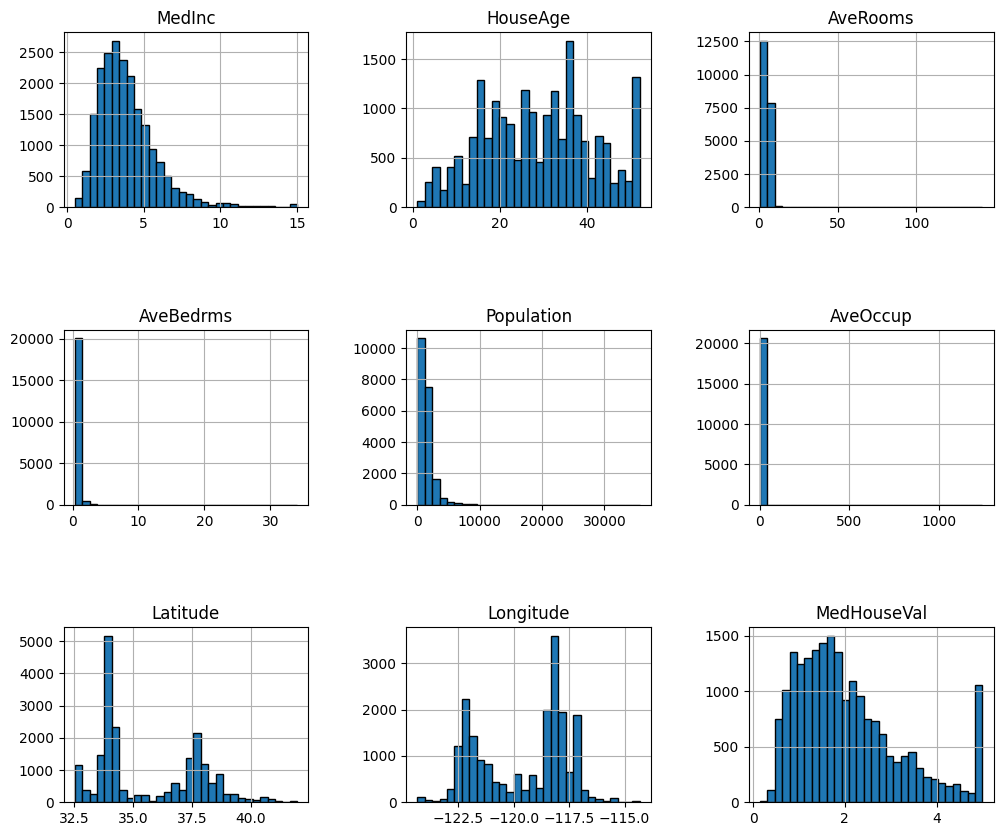

In [ ]:
california_housing.frame.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

Otra de las comprobaciones importantes que debemos realizar antes de lanzar nuestro modelo de regresión lineal es verificar la relación lineal entre cada una de las variables. Recuerda que nos interesa sobre todo la relación entre la variable dependiente con el resto de variables dependientes. Para ello, haremos uso de la función corr() que calcula la correlación de Pearson.

<Axes: >

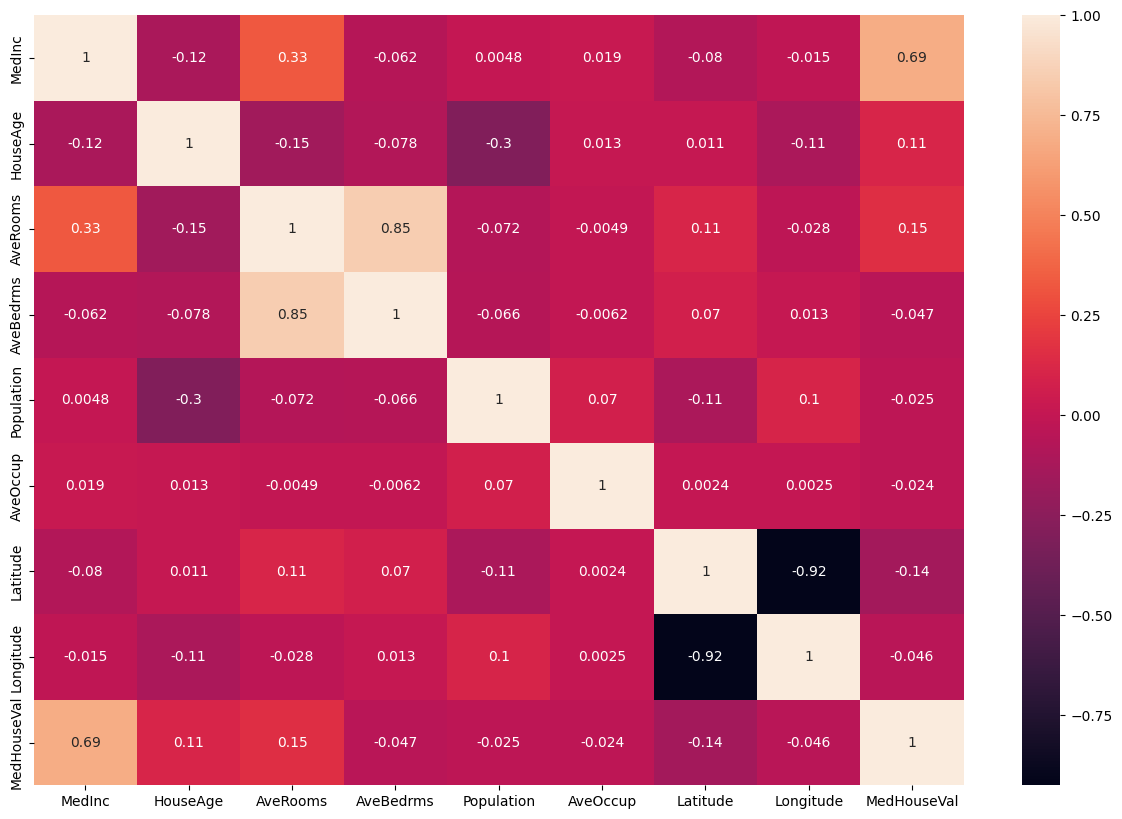

In [ ]:
##----------------------------------------------------
# Comprobar la correlación lineal entre las variables

plt.figure(figsize=(15,10))
sns.heatmap(california_housing.frame.corr(),annot=True)

En el siguiente paso, vamos a dividir nuestro dataset en dos: **Train** y **Test**.  El primero lo usaremos para entrenar el modelo de regresión lineal múltiple y obtener los parámetros **ßi** y la segunda partición tiene como finalidad evaluar la calidad del modelo con un dataset que no ha visto previamente. Recuerda que hacemos esto para evitar cualquier **sobreajuste** del modelo y así evitar que pierda su propiedad de **generalización**. Es decir, que nuestro modelo sea capaz de realizar predicciones adecuadas sobre datos nunca vistos.

De igual forma, eliminaremos del dataset la variable **AveBedrms**. La razón es por lo que comentamos anteriormente, tiene una alta colinealidad con la variable independiente **AveRooms** y además, comparada a esta no tiene una correlación tan alta con nuestra variable objetivo **MedHouseVal**.

Usaremos un valor 0,8 para definir que el 80% de los datos se use para el conjunto de train. A la hora de definir este número hay que tener en cuenta que cuanto mayor sea más datos tendrá para aprender pero tendremos menos datos “nuevos” para generar ese conjunto de test.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
  california_housing.data.drop('AveBedrms', axis = 1),
  california_housing.target,
  train_size = 0.8,
  random_state = 1234,
  shuffle = True
)
print(X_train)

        MedInc  HouseAge  AveRooms  Population  AveOccup  Latitude  Longitude
17595   3.3682      40.0  6.045902       719.0  2.357377     37.31    -121.89
6073   11.1077      32.0  8.010526       295.0  3.105263     34.07    -117.85
6251    4.1190      32.0  4.651235      1326.0  4.092593     34.04    -117.97
3161    1.7656      26.0  4.149367      1222.0  3.093671     35.23    -118.85
1887    3.1500      27.0  6.721805      1010.0  2.531328     38.92    -119.98
...        ...       ...       ...         ...       ...       ...        ...
8222    5.0000      21.0  3.062500        29.0  1.812500     33.76    -118.23
9449    2.7530      14.0  5.789030      1153.0  2.432489     37.39    -119.85
8471    4.2083      33.0  5.026163      1073.0  3.119186     33.91    -118.32
17048   6.7058      44.0  6.335430      1235.0  2.589099     37.47    -122.27
1318    5.4409       4.0  7.853352      2429.0  3.392458     37.99    -121.77

[16512 rows x 7 columns]


In [ ]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

Finalmente, evaluaremos el modelo con el conjunto de Test. En este caso en particular, nos interesa obtener del modelo la estimación de los distintos parámetros ßi asociados a cada una de las variables. Y por otro lado, queremos verificar el r^2 o coeficiente de determinación, que mide la proporción de varianza en la variable dependiente que puede ser explicada a través de las variables independientes. Lo que es igual a medir que tan bien se ajustan los datos con el modelo de regresión.

In [ ]:
# Información del modelo
# ==============================================================================
print("Intercept:", modelo.intercept_)
print("Coeficiente:", list(zip(X_train.columns, modelo.coef_.flatten(), )))
print("Coeficiente de determinación R^2:", modelo.score(X_test, y_test))

Intercept: -38.41352870861286
Coeficiente: [('MedInc', 0.3709116452580144), ('HouseAge', 0.009707151507351103), ('AveRooms', 0.014168961809859368), ('Population', -4.289167755253467e-06), ('AveOccup', -0.0037559391287753565), ('Latitude', -0.4495821514694884), ('Longitude', -0.4576865859673649)]
Coeficiente de determinación R^2: 0.5945342038911727


En este caso tenemos un r^2 = 0.59. Lo que viene a decir que un 59% de la variabilidad observada en el target o variable dependiente se explica por el modelo de regresión que hemos entrenado.

Coefficient of Determination: It is the correlation coefficient. In a regression, this term is used to define the precision or degree of fit

In [ ]:
X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:            MedHouseVal   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.596
Method:                 Least Squares   F-statistic:                     3486.
Date:                Sat, 03 Jun 2023   Prob (F-statistic):               0.00
Time:                        17:20:43   Log-Likelihood:                -18267.
No. Observations:               16512   AIC:                         3.655e+04
Df Residuals:                   16504   BIC:                         3.661e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -38.4135      0.741    -51.816      0.0

In [ ]:
est2.params

const        -38.413529
MedInc         0.370912
HouseAge       0.009707
AveRooms       0.014169
Population    -0.000004
AveOccup      -0.003756
Latitude      -0.449582
Longitude     -0.457687
dtype: float64

# Regresión Logística

Se usa principalmente en problemas de clasificación entre dos clases o clasificación binaria. Su fácil implementación e interpretabilidad lo convierten en el modelo de referencia al momento de atacar cualquier problema de clasificación.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
col_names = ['pregnant', 'glucose', 'bp',
  'skin', 'insulin', 'bmi',
  'pedigree', 'age', 'label']

diabetes = pd.read_csv("diabetes.csv", header=0, names = col_names)
diabetes.head()

pregnant  glucose  bp  skin  insulin   bmi  pedigree  age  label
0         6      148  72    35        0  33.6     0.627   50      1
1         1       85  66    29        0  26.6     0.351   31      0
2         8      183  64     0        0  23.3     0.672   32      1
3         1       89  66    23       94  28.1     0.167   21      0
4         0      137  40    35      168  43.1     2.288   33      1

In [ ]:
diabetes.describe()

pregnant     glucose          bp        skin     insulin         bmi  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

         pedigree         age       label  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000  
50%      0.372500   29.000000    0.000000  
75%      0.626250   41.000000    1.000000  
max      2.420000   81.000000    1.000000

En los problemas de clasificación, además de hacer una exploración de las variables predictoras a través de describe(), se considera una buena práctica analizar la distribución de la variable de salida, en este caso label. Esto nos ayuda a entender si los datos están o no desbalanceados, en cuyo caso podría afectar el comportamiento de nuestro modelo.

Observa que usamos la función value_counts de 2 formas distintas, en primer lugar obtenemos el número total de casos y en segundo lugar obtenemos el porcentaje de forma automática.

In [ ]:
diabetes.label.value_counts()

0    500
1    268
Name: label, dtype: int64

In [ ]:
diabetes.label.value_counts(normalize = True)

0    0.651042
1    0.348958
Name: label, dtype: float64

En este caso se observa que solo el 34% de la población sufre de diabetes. Esta es una situación bastante común en datasets relacionados a problemas médicos. En las siguientes unidades, trabajaremos con técnicas para minimizar el error debido a tener un conjunto de datos desbalanceados.

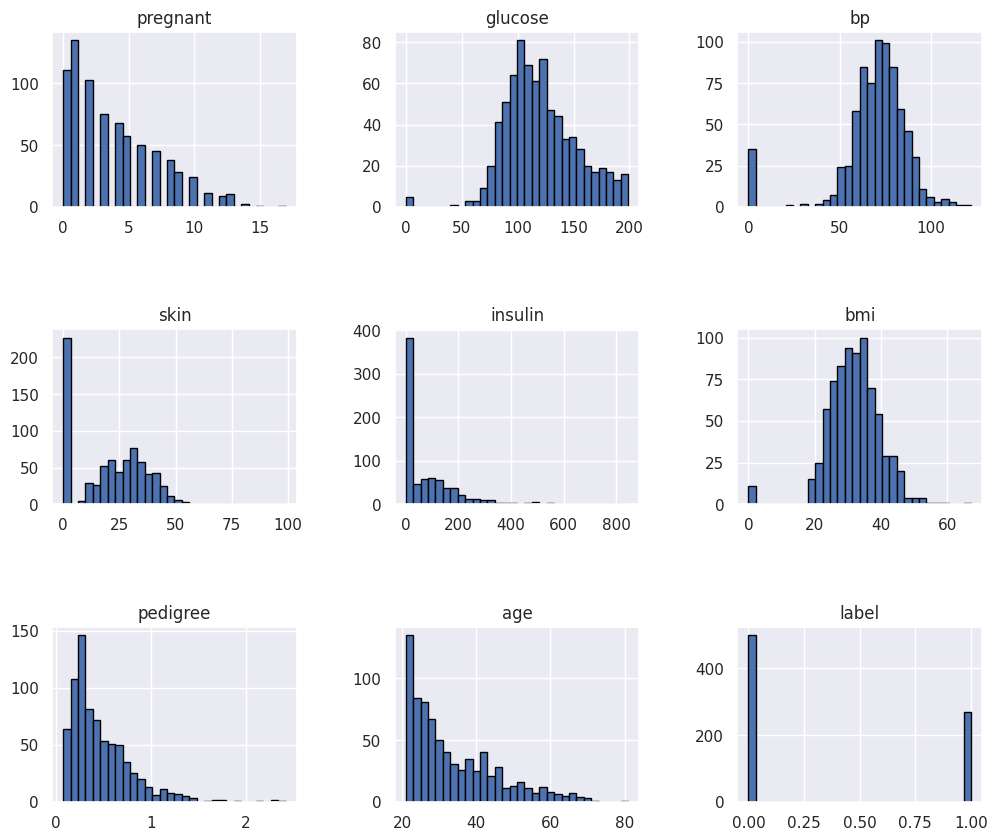

In [ ]:
diabetes.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

<Axes: >

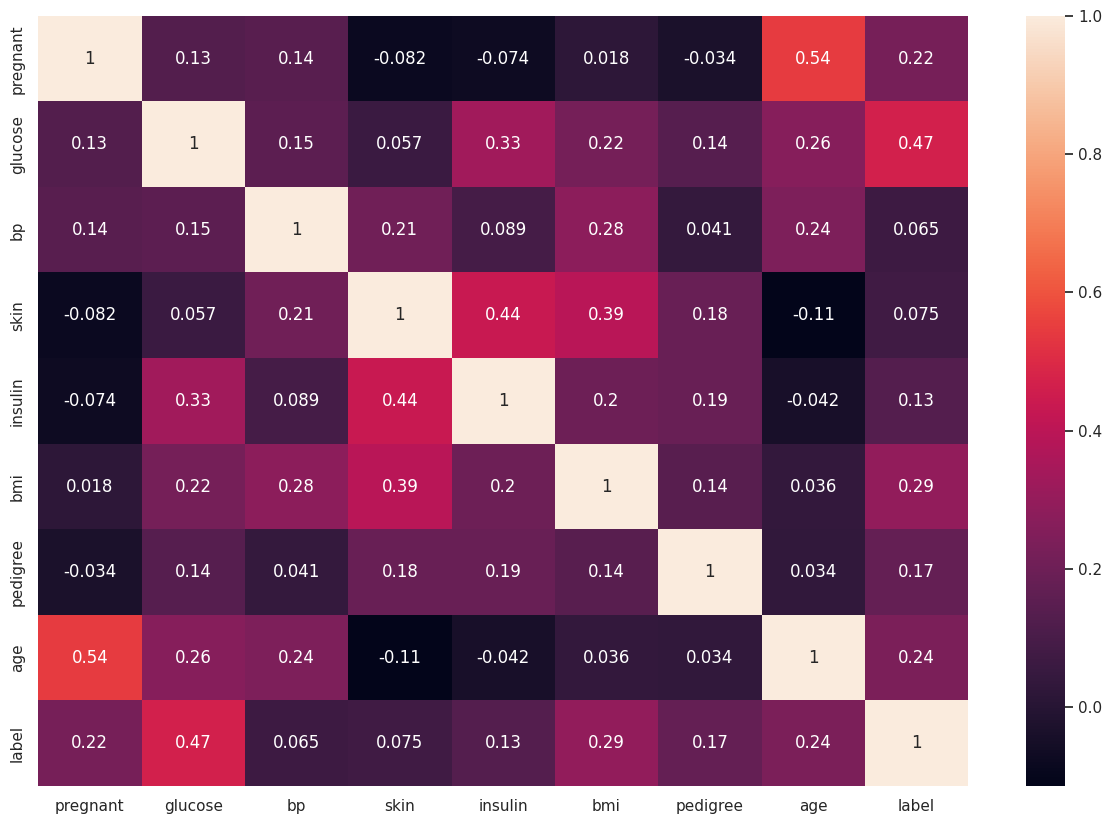

In [ ]:
##----------------------------------------------------
# Comprobar la correlación lineal entre las variables

plt.figure(figsize=(15,10))
sns.heatmap(diabetes.corr(),annot=True)

Con respecto a las correlaciones de las variables independientes y la variable dependiente, no se observa una gran diferencia entre las variables predictoras.

Por otro lado, si analizamos el comportamiento a pares de cada una de las variables con respecto a la etiqueta usando la función pairplot(). Se observa que no existe un par de variables que generen una clara separación lineal para las dos clases ya que todos los pares de variables muestran nubes de puntos mezcladas entre sí.

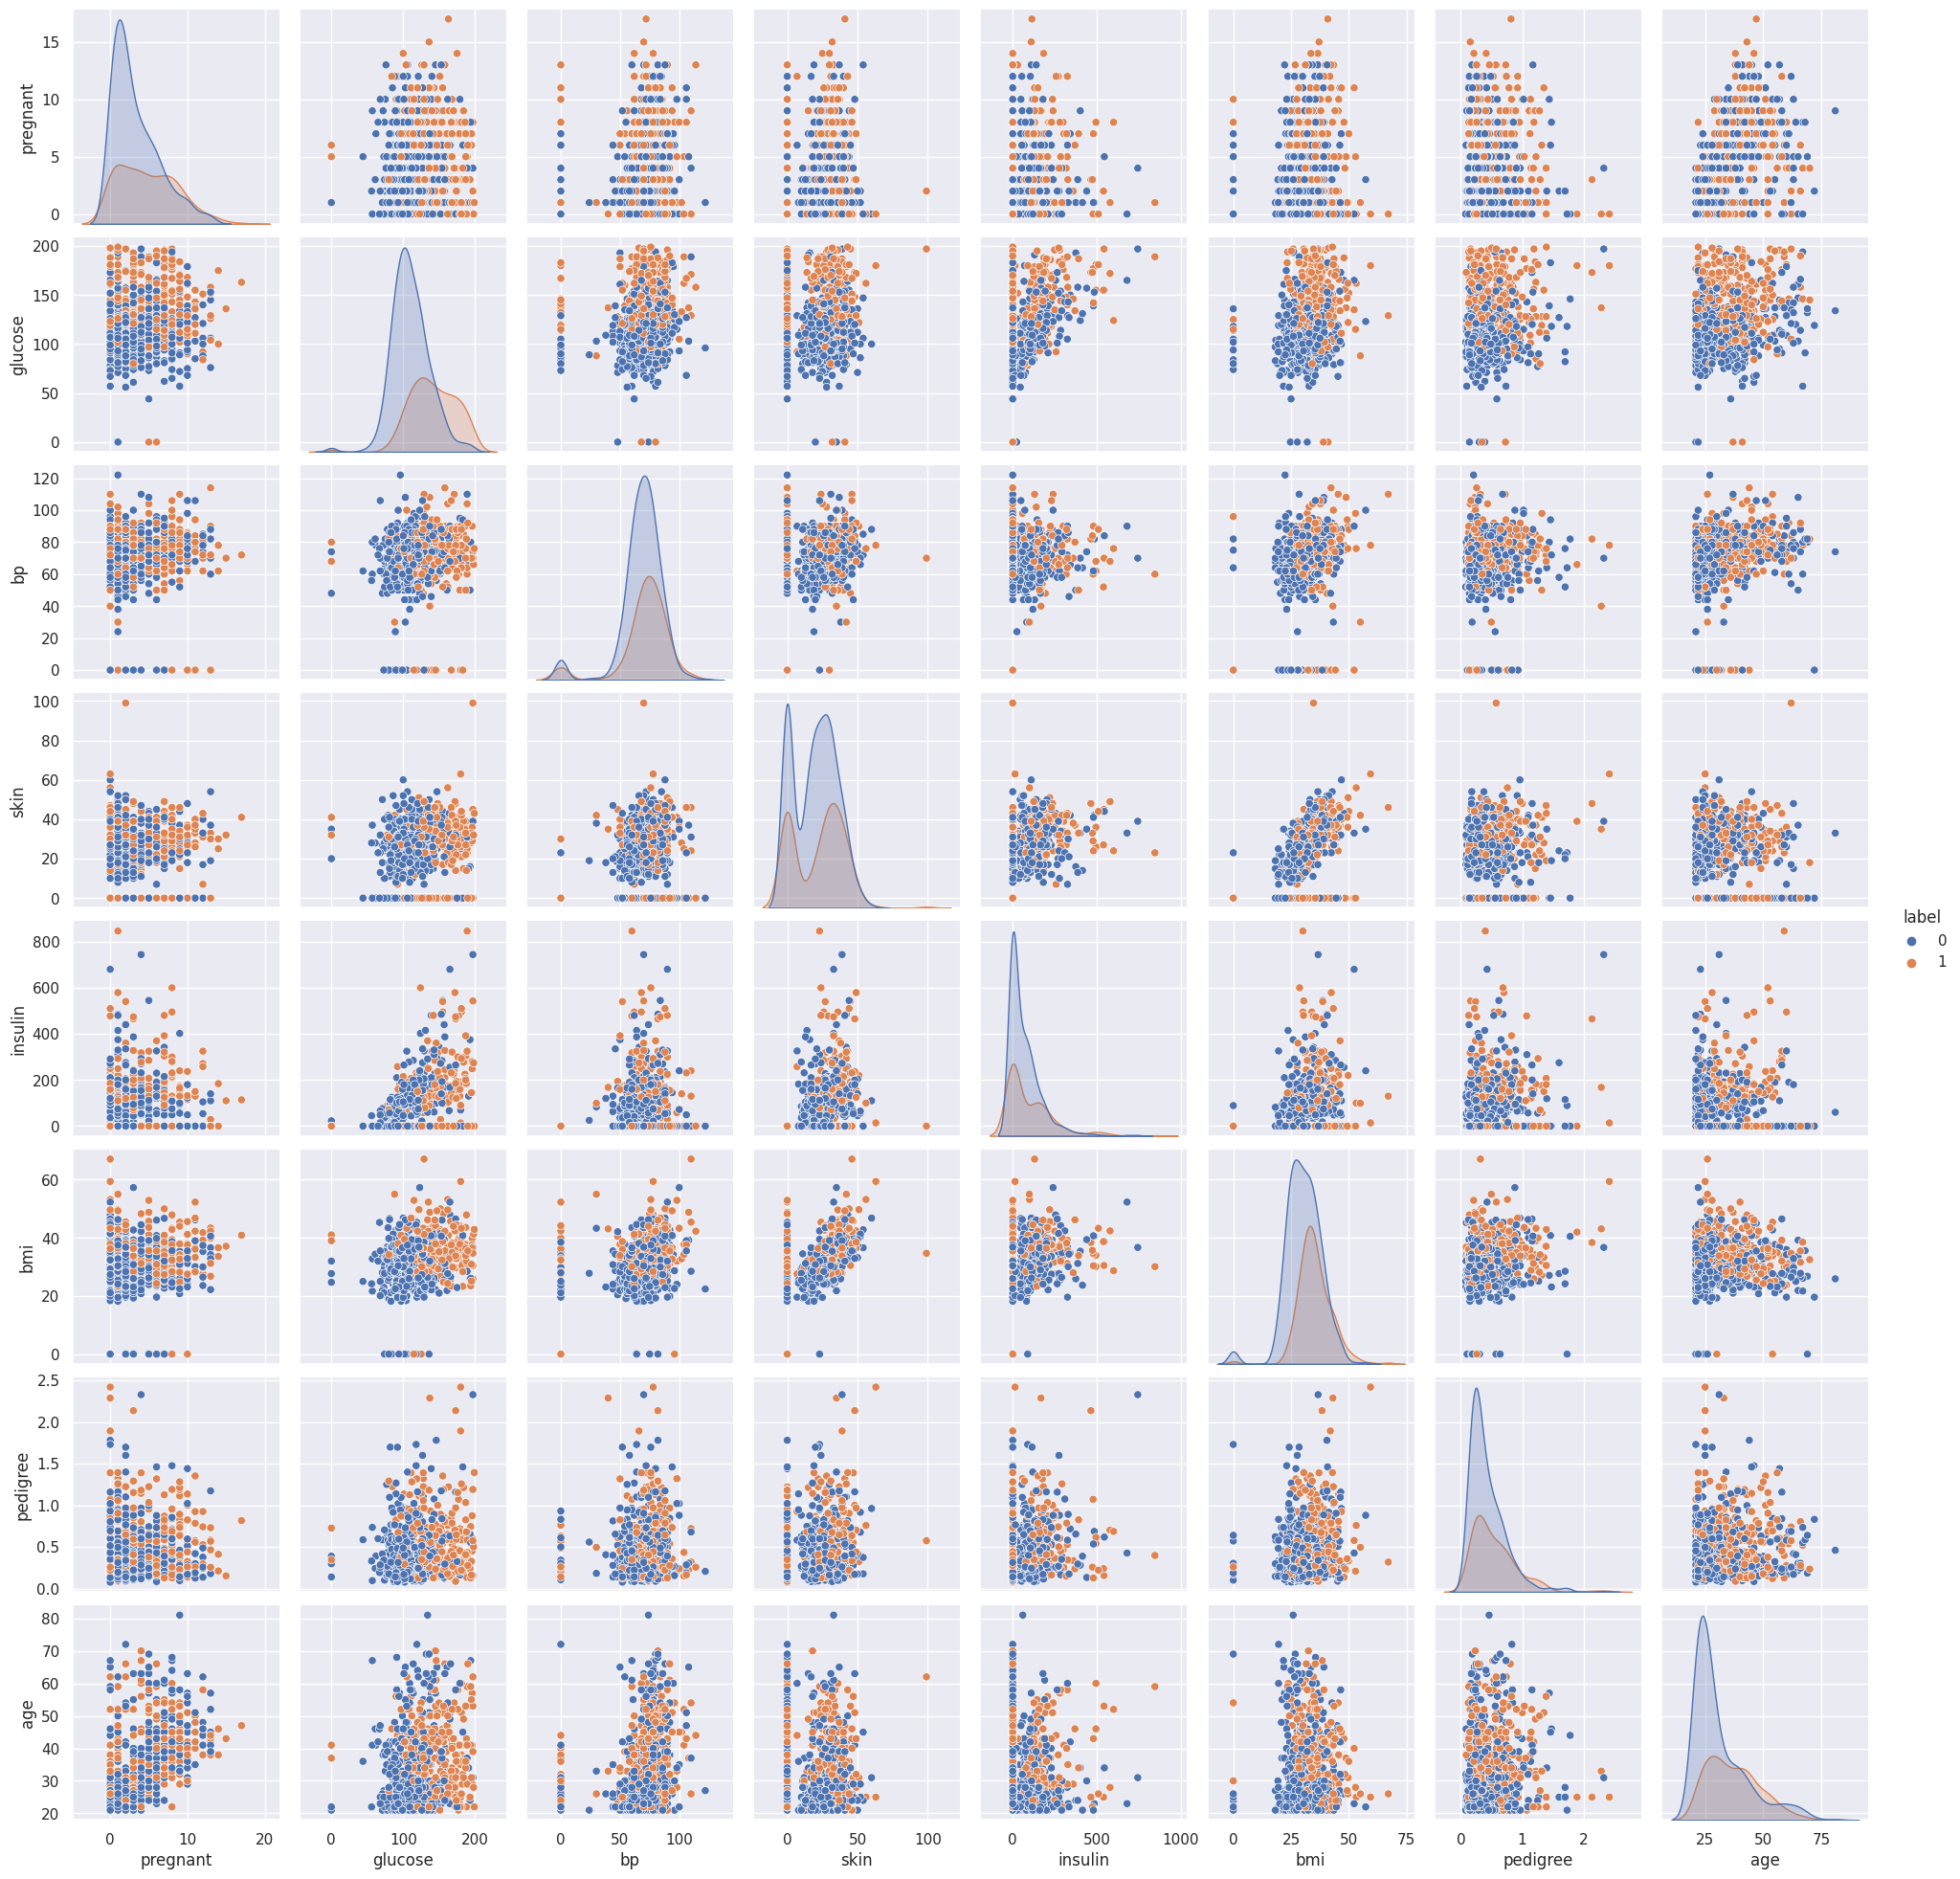

In [ ]:
sns.pairplot(diabetes, hue = 'label')

Ahora vamos a crear dos datasets: uno con las variables predictoras y otro con la variable dependiente, que serán X e y respectivamente.

In [ ]:
diabetes.columns

Index(['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree',
       'age', 'label'],
      dtype='object')

In [ ]:
X = diabetes.drop('label', axis=1)
y = diabetes.label

X.head()

pregnant  glucose  bp  skin  insulin   bmi  pedigree  age
0         6      148  72    35        0  33.6     0.627   50
1         1       85  66    29        0  26.6     0.351   31
2         8      183  64     0        0  23.3     0.672   32
3         1       89  66    23       94  28.1     0.167   21
4         0      137  40    35      168  43.1     2.288   33

In [ ]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: label, dtype: int64

Ahora divide la muestra en dos particiones, una para entrenamiento (train) y otra para test. En este caso usamos un 30% de los datos para el conjunto de test.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.30,
    random_state=1234)

Ahora tenemos todo listo para comenzar a entrenar el modelo, vamos a inicializar nuestro modelo con los parámetros por defecto, incluyendo solo el random_state = 1234. Este argumento lo definimos porque queremos obtener siempre los mismos resultados a pesar de que lancemos nuestros procesos en distintos tiempos.

In [ ]:
# Inicializar el modelo usando los parámetros predeterminados
logreg = LogisticRegression(random_state = 1234, max_iter=500)

# Ajutar el modelo a los datos

logreg.fit(X_train, y_train)

LogisticRegression(max_iter=500, random_state=1234)

Finalmente, evaluaremos nuestro modelo de regresión logística comparando los resultados con el dataset de Test. Recuerda que este dataset no se ha usado en el entrenamiento, por lo tanto el modelo desconoce las etiquetas reales. Mantener esta condición es importante para estar seguros de los resultados de nuestro modelo. Aprovechamos para mostrar por pantalla la precisión del modelo comparando los valores predichos, y_pred, con los valores de las etiquetas y_test. En este caso, nuestra precisión es del 77%.

In [ ]:
# Predecir para el dataset de Test

y_pred = logreg.predict(X_test)

# Información del modelo
# ==============================================================================
print("Precisión del modelo:", accuracy_score(y_test, y_pred, normalize=True))

Precisión del modelo: 0.7705627705627706


Si usamos el comando classification_report() obtenemos reporte completo del comportamiento de nuestro modelo con respecto al dataset de test.

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.91      0.83       147
           1       0.77      0.52      0.62        84

    accuracy                           0.77       231
   macro avg       0.77      0.72      0.73       231
weighted avg       0.77      0.77      0.76       231



# Técnicas de regularización

Se pide entrenar un modelo de regresión que nos ayude a determinar el contenido de grasa de cierto producto alimenticio. Para resolver este problema, contamos con un conjunto de 100 variables predictoras asociadas al espectro de canales de absorción.

In [ ]:
pip install faraway

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 5.6 MB/s eta 0:00:00


In [ ]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

# Dataset de prueba
# ==============================================================================
import faraway.datasets.meatspec

In [ ]:
data = faraway.datasets.meatspec.load()
data.head(5)

V1       V2       V3       V4       V5       V6       V7       V8  \
1  2.61776  2.61814  2.61859  2.61912  2.61981  2.62071  2.62186  2.62334   
2  2.83454  2.83871  2.84283  2.84705  2.85138  2.85587  2.86060  2.86566   
3  2.58284  2.58458  2.58629  2.58808  2.58996  2.59192  2.59401  2.59627   
4  2.82286  2.82460  2.82630  2.82814  2.83001  2.83192  2.83392  2.83606   
5  2.78813  2.78989  2.79167  2.79350  2.79538  2.79746  2.79984  2.80254   

        V9      V10  ...      V92      V93      V94      V95      V96  \
1  2.62511  2.62722  ...  2.98145  2.96072  2.94013  2.91978  2.89966   
2  2.87093  2.87661  ...  3.29186  3.27921  3.26655  3.25369  3.24045   
3  2.59873  2.60131  ...  2.68951  2.67009  2.65112  2.63262  2.61461   
4  2.83842  2.84097  ...  2.97367  2.94951  2.92576  2.90251  2.87988   
5  2.80553  2.80890  ...  3.30025  3.27907  3.25831  3.23784  3.21765   

       V97      V98      V99     V100   fat  
1  2.87964  2.85960  2.83940  2.81920  22.5  
2  3.22659  3.21181  3.19600  3.17942  40.1  
3  2.59718  2.58034  2.56404  2.54816   8.4  
4  2.85794  2.83672  2.81617  2.79622   5.9  
5  3.19766  3.17770  3.15770  3.13753  25.5  

[5 rows x 101 columns]

Como puedes observar en la tabla anterior, tenemos un total de 100 variables predictoras. En general, dado el número de entradas que tenemos se podría considerar que es un número bastante alto de variables. Vamos a hacer un análisis de las correlaciones de estas variables

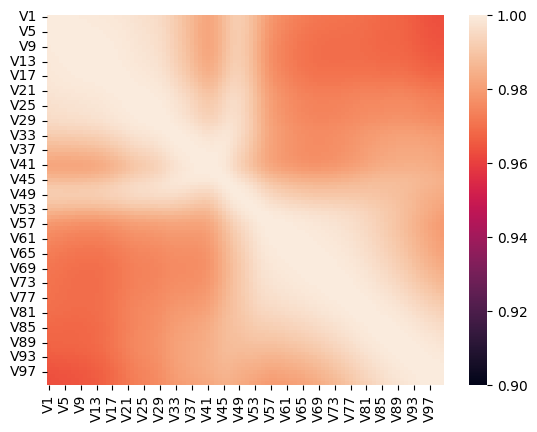

In [ ]:
# Any existing correlation?
# ==============================================================================
corrMatrix = data.iloc[:, 0:100].corr()
sns.heatmap(corrMatrix, vmin = 0.90, vmax=1)
plt.show()

De la figura tenemos que gran parte de las variables están altamente correlacionadas, con valores por encima de 0.98 en su mayoría. Por lo que aplicar un método de regularización es una buena estrategia para este problema.

Ahora divide la muestra en dos particiones, una para entrenamiento (train) y la otra para test. En este caso usaremos un 30% de los datos para el conjunto de test.

In [ ]:
# División de los datos en train y test
# ==============================================================================
X = data.iloc[:, 0:100]
y = data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    train_size = 0.7,
    random_state = 1234)

Lo primero que vamos a hacer, es entrenar un modelo de regresión lineal con los parámetros por defecto. Este modelo nos servirá de base para evaluar las posibles mejoras al aplicar los métodos de regularización.

In [ ]:
# LINEAR REGRESSION - MINIMOS CUADRADOS
# ==============================================================================
# Creación y entrenamiento del modelo
# ==============================================================================

modelo = LinearRegression()
modelo.fit(X = X_train, y = y_train)

LinearRegression()

Vamos a visualizar el resultado con la siguiente pieza de código:

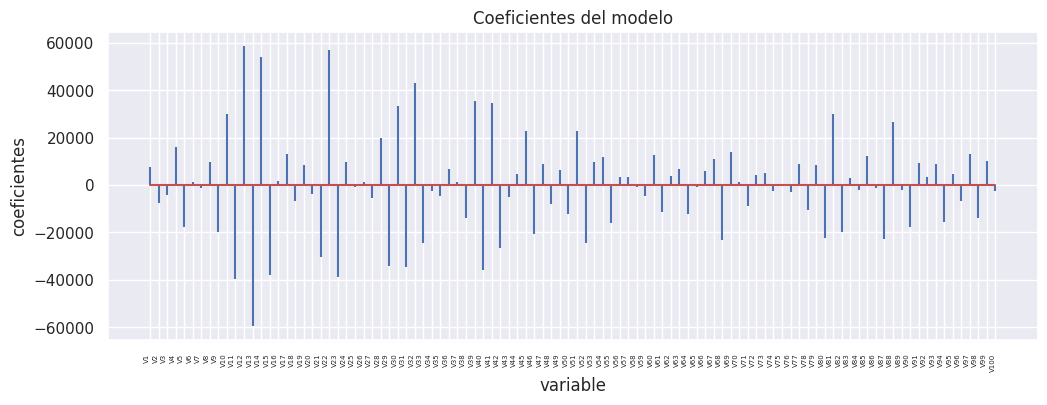

In [ ]:
# Coeficientes del modelo
# ==============================================================================
df_coeficientes = pd.DataFrame(
    {'predictor': X_train.columns,
    'coef': modelo.coef_.flatten()}
)

# Plot de los 100 coeficientes
# ==============================================================================
fig, ax = plt.subplots(figsize=(12, 4))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=5)
ax.set_xlabel('variable')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo');

Puedes observar que en la gráfica tenemos variables predictoras con coeficientes que varían entre [-60.000, 60.000] acompañados de otros coeficientes más pequeños en cuanto a su orden de magnitud.

Finalmente, vamos a calcular el error, en este caso el MSE (mean square error o error cuadrático medio) para tener una base con que comparar cuando apliquemos las regularizaciones.

In [ ]:
# Predicciones test
# ==============================================================================
predicciones = modelo.predict(X=X_test)

# Error de test del modelo  - Ordinary Least Squares
# ==============================================================================
mse_ols = mean_squared_error(
  y_true = y_test,
  y_pred = predicciones,
  squared = True
)

# If squared = True returns MSE value, if False returns RMSE value.
print(f"El error (MSE) de test es: {round(mse_ols,2)}")
print(f"Las predicciones del modelo final se alejan en promedio {round(mse_ols,2)} unidades del valor real.")

El error (MSE) de test es: 14.74
Las predicciones del modelo final se alejan en promedio 14.74 unidades del valor real.


In [ ]:
# RIDGE - L2
# ==============================================================================
# Creación y entrenamiento del modelo (probamos diferentes valores de alpha)
# ==============================================================================
# Por defecto Ridge utiliza el mean squared error

# Evolución de los coeficientes en función de lambda
# ==============================================================================
lambdas = np.logspace(-11, -3, 100)

coefs = []
mse_ridge = []

for lambda_ in lambdas:
  modelo_temp = Ridge(alpha = lambda_)
  modelo_temp.fit(X_train, y_train)
  coefs.append(modelo_temp.coef_.flatten())

  predicciones = modelo_temp.predict(X=X_test)
  mse_ridge.append(mean_squared_error(
  y_true = y_test,
  y_pred = predicciones,
  squared = True
))

Para esta parte, vamos a aplicar la regularización de Ridge. Como queremos observar la influencia del parámetro λ, haremos un barrido de distintos valores para posteriormente comparar el error obtenido en cada uno de los casos.

Text(0.5, 0, 'λ')

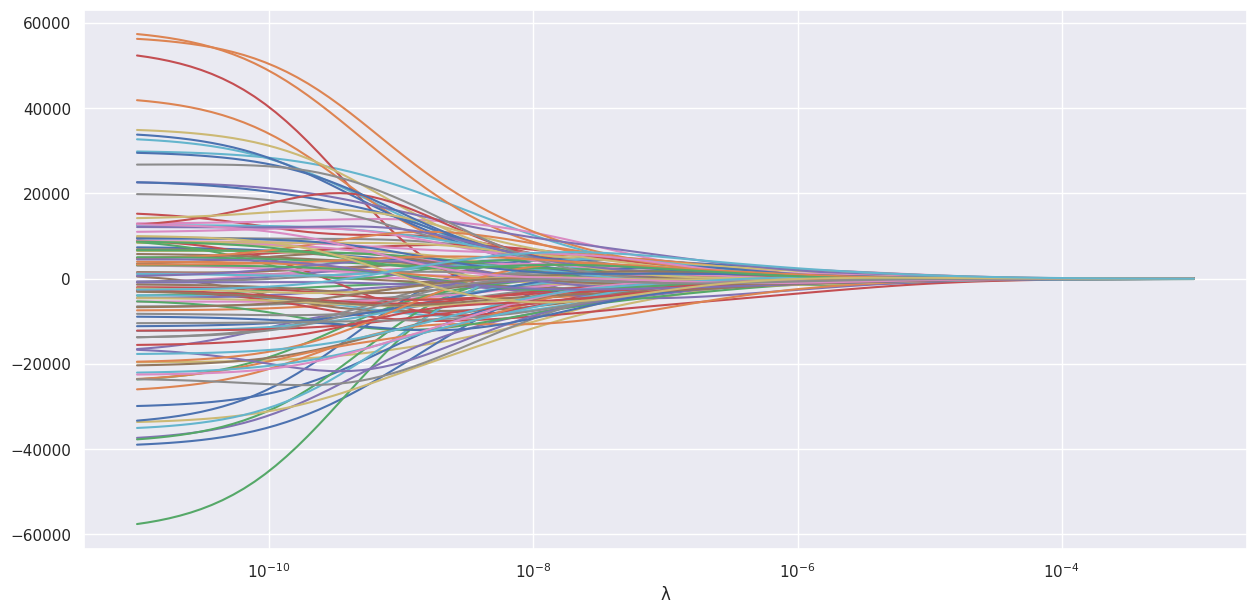

In [ ]:
# Plot Evolución de los coeficientes en función de lambda
# ==============================================================================
fig, ax = plt.subplots(figsize=(15, 7))
ax.plot(lambdas, coefs)
ax.set_xscale('log')
ax.set_xlabel('\u03BB')

In [ ]:
# Obtén el lambda que nos devuelve menor error medio
# ==============================================================================
min_mse_ridge = min(mse_ridge)
index_min_mse = mse_ridge.index(min_mse_ridge)
min_mse_lambda = lambdas[index_min_mse]

print(f"El parámetro lambda con menor (MSE) es: {min_mse_lambda}")
print(f"Las predicciones del modelo final se alejan en promedio {round(min_mse_ridge,2)} unidades del valor real.")

El parámetro lambda con menor (MSE) es: 3.764935806792471e-06
Las predicciones del modelo final se alejan en promedio 4.62 unidades del valor real.


De todas las soluciones obtenidas, vamos a quedarnos con el parámetro de regularización **λ** con el que hayamos obtenido el menor error cuadrático medio (MSE).

Recuerda que con este tipo de regularización, mitigamos los efectos de correlación de las variables predictoras.

En este caso, hemos logrado reducir el error cuadrático medio comparado con el modelo base que planteamos anteriormente.

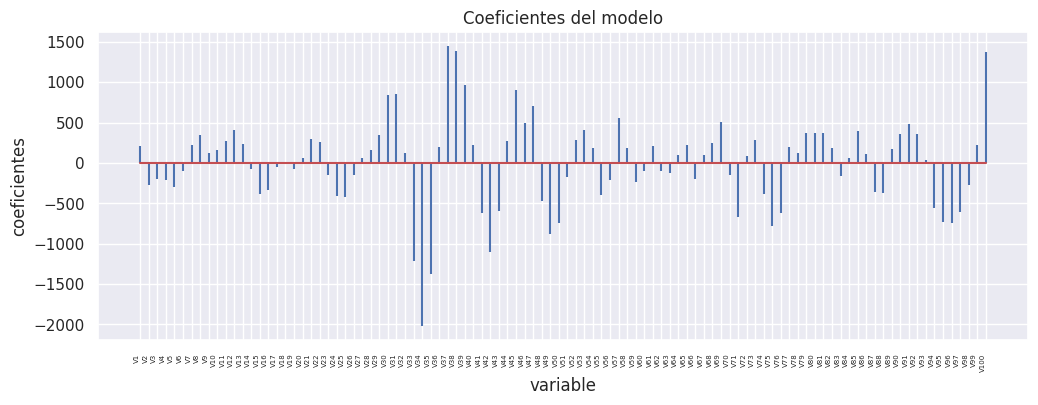

In [ ]:
# Coeficientes del modelo (recuerda que los tenemos almacenados)
# ==============================================================================
df_coeficientes = pd.DataFrame(
  {'predictor': X_train.columns,
  'coef': coefs[index_min_mse]}
)

fig, ax = plt.subplots(figsize=(12, 4))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=5)
ax.set_xlabel('variable')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo');

Si graficamos el valor de los coeficientes del modelo final (con el valor de λ anterior). Podemos observar que la reducción de la magnitud de los coeficientes es significativa, teniendo ahora valores entre [-1500, 2.000] aproximadamente.

Replicamos el procedimiento pero esta vez con la regularización de Lasso.

In [ ]:
# LASSO - L1
# ==============================================================================
# Creación y entrenamiento del modelo (probamos diferentes valores de alpha)
# ==============================================================================
# Por defecto Lasso utiliza el mean squared error

# Evolución de los coeficientes en función de alpha
# ==============================================================================
lambdas = np.logspace(-3.8, 0, 100)
coefs = []
mse_lasso = []

for lambda_ in lambdas:
  modelo_temp = Lasso(alpha=lambda_, selection='random', max_iter = 50000, tol = 0.01)
  modelo_temp.fit(X_train, y_train)
  coefs.append(modelo_temp.coef_.flatten())

  predicciones = modelo_temp.predict(X = X_test)
  mse_lasso.append(
    mean_squared_error(
      y_true = y_test,
      y_pred = predicciones,
      squared = True
    )
  )

En este caso podemos observar que los coeficientes sí pueden llegar a cero y adicionalmente, la convergencia tiene un poco más de variabilidad.

Text(0.5, 0, 'λ')

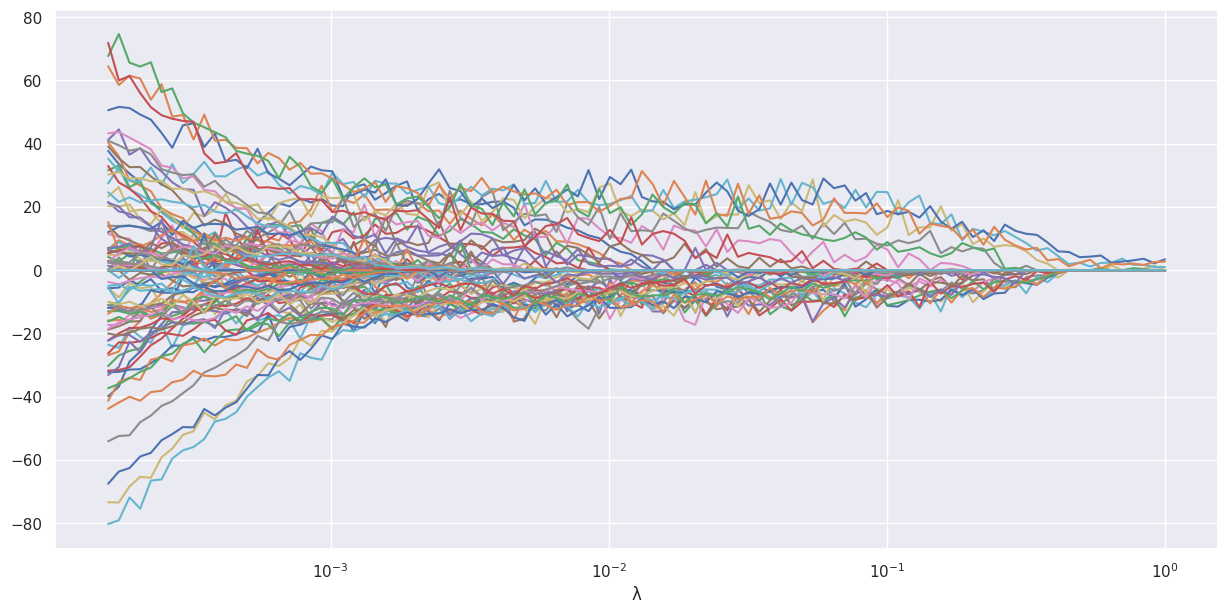

In [ ]:
# Plot Evolución de los betas en función de alpha
# ==============================================================================

fig, ax = plt.subplots(figsize=(15, 7))
ax.plot(lambdas, coefs)
ax.set_xscale('log')
ax.set_xlabel('\u03BB')

In [ ]:
# Obtén el lambda que nos devuelve menor error medio
# ==============================================================================
min_mse_lasso = min(mse_lasso)
index_min_mse = mse_lasso.index(min_mse_lasso)
min_mse_lambda = lambdas[index_min_mse]
l1_coef = coefs[index_min_mse]
p_variables = sum(abs(l1_coef) > 0)

print(f"El parámetro lambda con menor (MSE) es: {min_mse_lambda}")
print(f"Las predicciones del modelo final se alejan en promedio {round(min_mse_lasso,2)} unidades del valor real.")
print(f"Estas predicciones se consiguen con {p_variables} variables")

El parámetro lambda con menor (MSE) es: 0.0011077568505097088
Las predicciones del modelo final se alejan en promedio 9.85 unidades del valor real.
Estas predicciones se consiguen con 79 variables


Para terminar la práctica, podemos explorar la magnitud de los coeficientes del modelo de regresión lineal con regularización L2. Donde encontramos valores bastante más pequeños en orden de magnitud en comparación al modelo base.

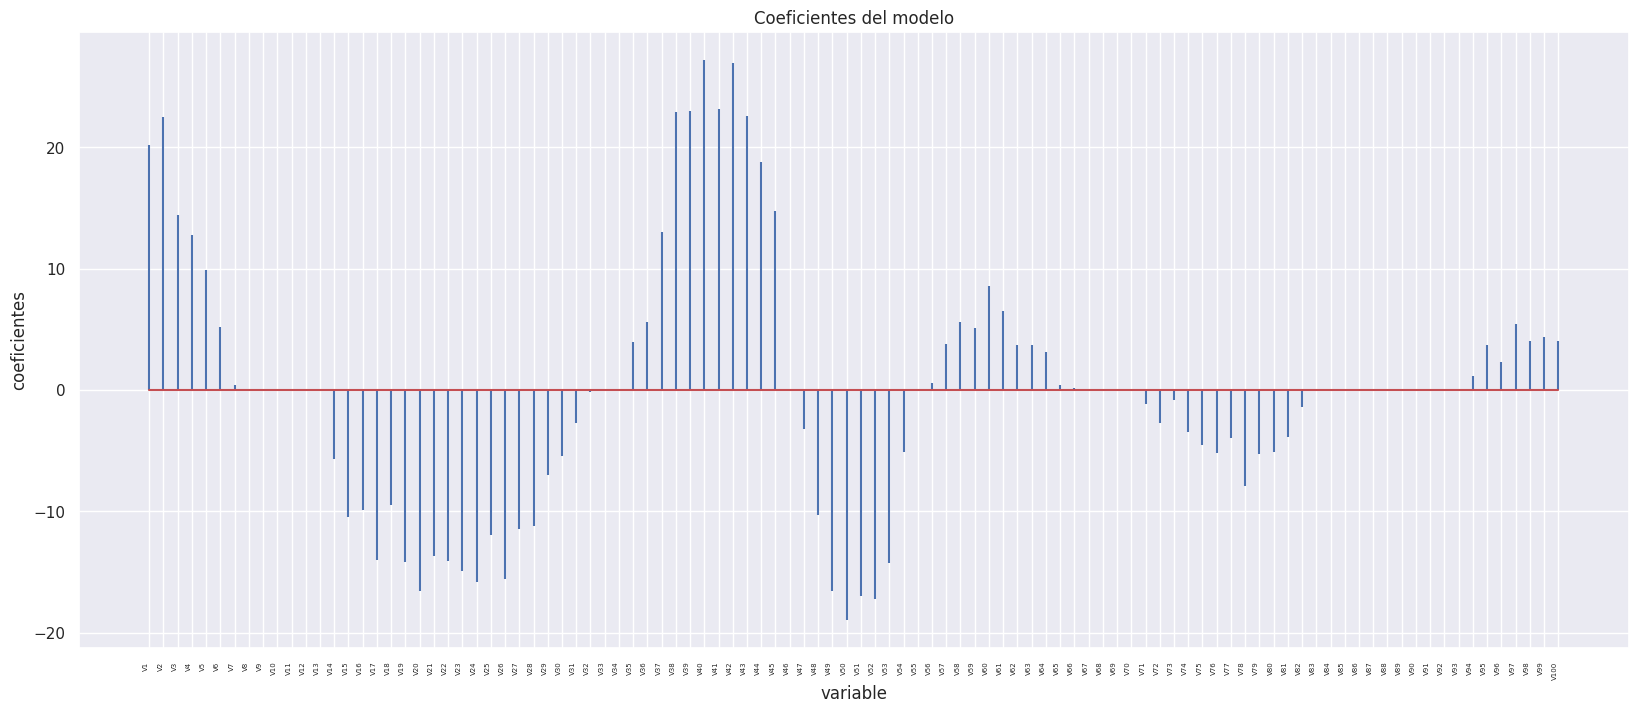

In [ ]:
# Coeficientes del modelo (recuerda que los tenemos almacenados)
# ==============================================================================
df_coeficientes = pd.DataFrame(
  {'predictor': X_train.columns,
  'coef': coefs[index_min_mse]}
)

fig, ax = plt.subplots(figsize=(20, 8))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=5)
ax.set_xlabel('variable')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo');

# SVM

Los algoritmos de Máquinas de Vectores de Soportes o mejor conocidos como SVM por sus siglas en inglés de Support Vector Machines son una familia de modelos muy versátiles y útiles dentro del mundo de la ciencia de datos.
Tienen la capacidad de resolver tanto problemas de clasificación como de regresión lineal y no lineal para ambos casos.

En general, los modelos de SVM tienen un mejor desempeño con datasets pequeños o de tamaño medio, en torno a cientos o miles de registros. Viéndose un poco más afectados en los problemas con datasets con muchos más registros dado que no suelen escalar bien en estos casos.

## Clasificación con SVM

Consiste en un dataset compuesto de dos variables independientes: edad del cliente y salario estimado. Donde la variable dependiente a predecir es la posibilidad de comprar un coche nuevo (SUV), variable binaria.

In [ ]:
# Cargar Librerías

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import svm

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
social_net_ads = pd.read_csv("Social_Network_Ads.csv")
social_net_ads.head()

Age  EstimatedSalary  Purchased
0   19            19000          0
1   35            20000          0
2   26            43000          0
3   27            57000          0
4   19            76000          0

Haciendo un descriptivo de los datos con el comando .describe(), encontramos que las variables predictoras no están estandarizadas. Los algoritmos de SVM tienen un mejor funcionamiento cuando las variables predictoras están estandarizadas, por lo que en los próximos pasos realizaremos la transformación.

In [ ]:
social_net_ads.describe()

Age  EstimatedSalary   Purchased
count  400.000000       400.000000  400.000000
mean    37.655000     69742.500000    0.357500
std     10.482877     34096.960282    0.479864
min     18.000000     15000.000000    0.000000
25%     29.750000     43000.000000    0.000000
50%     37.000000     70000.000000    0.000000
75%     46.000000     88000.000000    1.000000
max     60.000000    150000.000000    1.000000

Si realizamos un pairplot para visualizar la distribución de los datos, encontramos que el conjunto de puntos es linealmente no separable ya que los puntos de ambas clases se mezclan a lo largo del espacio. Por lo que probablemente un modelo lineal no sea el mejor enfoque para este caso.

Observa como el análisis inicial ya nos da importantes pistas sobre los pasos que vamos a dar a continuación. Ser consciente de ello va a facilitar el análisis del rendimiento del modelo si alguno de esos pasos no se llevan a cabo.

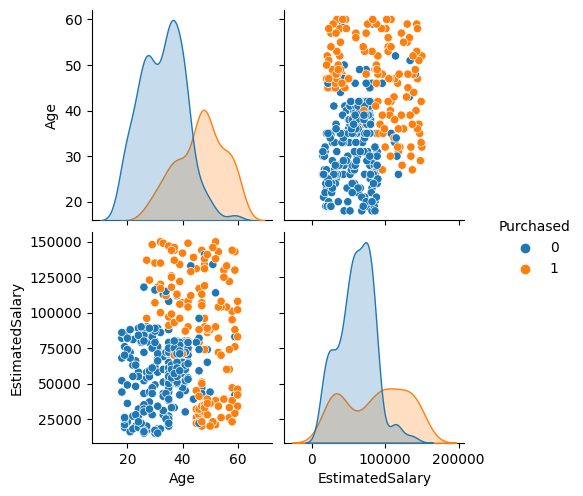

In [ ]:
sns.pairplot(social_net_ads, hue = 'Purchased')

Vamos a hacer la división del dataset de train y de test. En este caso, dejaremos un 30% de los puntos para la evaluación del test.

In [ ]:
X = social_net_ads[['Age','EstimatedSalary']]
y = social_net_ads[['Purchased']]

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.30,
    random_state = 0)

Usamos la función StandardScaler() para estandarizar nuestras variables predictoras. Ten en cuenta que estamos tomando los valores por defecto de la función, con lo cual vamos a obtener un conjunto de datos con media 0 y desviación estándar 1 para el caso de X_train haciendo la siguiente transformación

In [ ]:
# Estandarizar los datos

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train.mean(), X_train.std() , X_test.mean(), X_test.std()

(4.9167019661971216e-17, 1.0, -0.03731290472028073, 1.0190383932018008)

Para comparar el comportamiento de la SVM lineal con el caso no lineal, vamos a entrenar en primer lugar una SVM lineal. Para hacer esto basta con definir kernel = lineal en los parámetros del modelo.

In [ ]:
svm_linear = svm.SVC(kernel = 'linear', random_state = 12)

svm_linear.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear', random_state=12)

Hacemos la predicción del modelo lineal y en este caso obtenemos un precisión del modelo de 0.86.

In [ ]:
# Predecir para el dataset de Test

y_pred = svm_linear.predict(X_test)

# Información del modelo
# ==============================================================================
print("Precisión del modelo:", accuracy_score(y_test, y_pred, normalize=True))

Precisión del modelo: 0.8666666666666667


Haciendo una inspección gráfica de la frontera de decisión creada por la SVM lineal, podemos observar que existen puntos que se encuentran mal clasificados para ambas clases. En parte era lo esperado dado que el conjunto de datos era linealmente no separable.

<ipython-input-9-b972c636e613>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set['Purchased'] == j, 0], X_set[y_set['Purchased'] == j, 1],


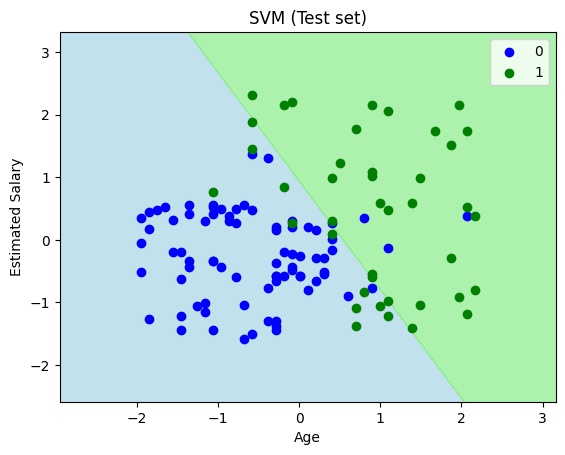

In [ ]:
from matplotlib.colors import ListedColormap

X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
  np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, svm_linear.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
  alpha = 0.75, cmap = ListedColormap(('lightblue', 'lightgreen')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
  plt.scatter(X_set[y_set['Purchased'] == j, 0], X_set[y_set['Purchased'] == j, 1],
    c = ListedColormap(('blue', 'green'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

Vamos ahora a repetir el procedimiento pero aplicando una función rbf como kernel de la función.

In [ ]:
svm_rbf = svm.SVC(kernel = 'rbf', random_state = 0)

svm_rbf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(random_state=0)

En este caso obtenemos una precisión de 0.90, mejorando el resultado obtenido anteriormente.

In [ ]:
# Predecir para el dataset de Test

y_pred = svm_rbf.predict(X_test)

# Información del modelo
# ==============================================================================
print("Precisión del modelo:", accuracy_score(y_test, y_pred, normalize=True))

print(classification_report(y_test, y_pred))

Precisión del modelo: 0.9083333333333333
              precision    recall  f1-score   support

           0       0.95      0.91      0.93        79
           1       0.84      0.90      0.87        41

    accuracy                           0.91       120
   macro avg       0.89      0.91      0.90       120
weighted avg       0.91      0.91      0.91       120



De igual manera, haciendo una inspección gráfica encontramos que la frontera en este caso no es lineal y se adapta mejor al conjunto de test. El número de puntos mal clasificados se ha reducido considerablemente.

<ipython-input-12-3551178cc577>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set['Purchased'] == j, 0], X_set[y_set['Purchased'] == j, 1],


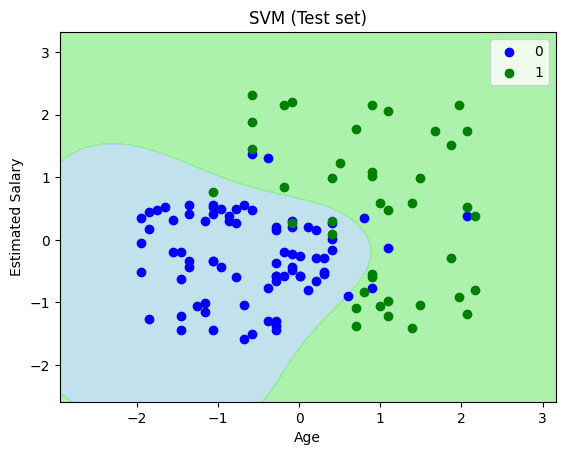

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
  np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, svm_rbf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
  alpha = 0.75, cmap = ListedColormap(('lightblue', 'lightgreen')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
  plt.scatter(X_set[y_set['Purchased'] == j, 0], X_set[y_set['Purchased'] == j, 1],
    c = ListedColormap(('blue', 'green'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Regresión con SVM

La idea asociada a los métodos de SVM para clasificación se puede extender fácilmente para el caso de **problemas de regresión**. Donde el modelo desarrollado por una SVM de regresión depende sólo de un **subconjunto** del dataset de train, dado que la función de coste ignora las muestras cuyas predicciones estén cercanas al target.

Por otro lado, mientras que en el problema de clasificación con la ayuda de los **vectores soporte** generamos una frontera de decisión de margen máximo entre las clases. En el caso de regresión, el algoritmo de SVM intenta ajustar tantas muestras posibles dentro de este margen cuya anchura es controlada por el **hiperparámetro** є ****, a mayor valor de є más ancho será el margen. Análogamente, reduciendo incrementaremos el número de **vectores soporte**.

En sklearn encontraremos tres distintas implementaciones para los modelos de **SVM de regresión:**

- **SVR**
- **NuSVR**
- **LinearSVR**

In [ ]:
# Cargar librerias

import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

Generamos unos datos sintéticos  a partir de la función sin(x) (que corresponde con la función trigonométrica del seno). Aplicaremos un poco de ruido a la variable independiente para darle un poco más de robustez al modelo.

In [ ]:
# Geramos datos sintéticos

X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()

# agregamos ruido a la variable independiente (target)
y[::5] += 3 * (0.5 - np.random.rand(8))

Posteriormente, entrenaremos tres modelos distintos variando la función de kernel en cada caso: rbf, linear y poly. En los tres casos fijamos el parámetro de regularización C = 100 (la intensidad de la regularización es inversamente proporcional a C) con esto variamos ligeramente el margen a una versión no tan rígida permitiendo errores de estimación. Finalmente, en el caso del kernel polinómico, usaremos una transformación de grado 3 o lo que equivale a ajustar los datos con un polinomio de grado 3.

In [ ]:
# Entrenamos 3 modelos con distintas funciones kernel

svr_rbf = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)
svr_lin = SVR(kernel="linear", C=100, gamma="auto")
svr_poly = SVR(kernel="poly", C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1)

Para evaluar el comportamiento para cada uno de los casos vamos a graficar los datos junto a su predicción. Es evidente en este caso que dado que los datos tenían un comportamiento no lineal, el kernel lineal no iba a ser capaz de predecir correctamente la variable independiente.

Por otro lado, en el caso de rbf y polinómica tenemos comportamientos similares. Con la ventaja en el caso de rbf que tenemos que definir previamente el grado del polinomio al que queremos ajustar.

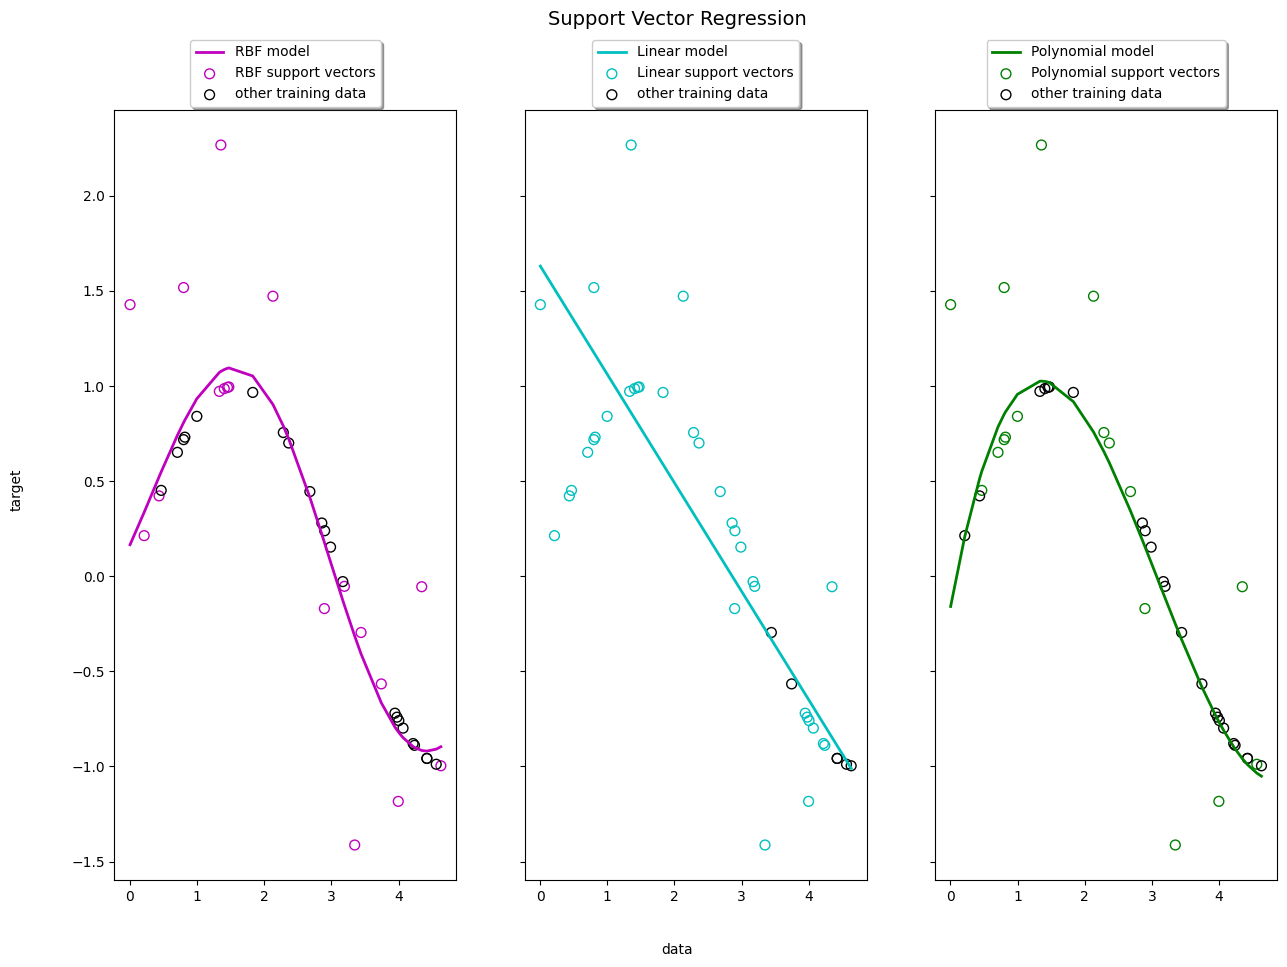

In [ ]:
# Graficamos los resultados

lw = 2

svrs = [svr_rbf, svr_lin, svr_poly]
kernel_label = ["RBF", "Linear", "Polynomial"]
model_color = ["m", "c", "g"]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), sharey=True)
for ix, svr in enumerate(svrs):
  axes[ix].plot(
    X,
    svr.fit(X, y).predict(X),
    color=model_color[ix],
    lw=lw,
    label="{} model".format(kernel_label[ix]),
  )
  axes[ix].scatter(
    X[svr.support_],
    y[svr.support_],
    facecolor="none",
    edgecolor=model_color[ix],
    s=50,
    label="{} support vectors".format(kernel_label[ix]),
  )
  axes[ix].scatter(
    X[np.setdiff1d(np.arange(len(X)), svr.support_)],
    y[np.setdiff1d(np.arange(len(X)), svr.support_)],
    facecolor="none",
    edgecolor="k",
    s=50,
    label="other training data",
  )
  axes[ix].legend(
    loc="upper center",
    bbox_to_anchor=(0.5, 1.1),
    ncol=1,
    fancybox=True,
    shadow=True,
  )

fig.text(0.5, 0.04, "data", ha="center", va="center")
fig.text(0.06, 0.5, "target", ha="center", va="center", rotation="vertical")
fig.suptitle("Support Vector Regression", fontsize=14)
plt.show()

# Naïve Bayes

Los algoritmos de Naive Bayes (NB) o de Bayes son una familia de modelos de clasificación que tienen cierta similitud con los modelos lineales que discutimos en secciones anteriores y cuya mayor fortaleza es la **rapidez** en el momento del **entrenamiento**.

Se consideran excelentes modelos de referencia y suelen utilizarse en conjuntos de datos muy grandes, en los que el entrenamiento incluso de un modelo lineal podría llevar demasiado tiempo.

Como puedes observar, en este caso cargaremos la librería GaussianNB que es la encargada de cargar los modelos de naïve bayes con variables predictivas numéricas continuas.

In [ ]:
# Cargar Librerías

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Hacemos la carga de los datos con usando el comando read_csv()

In [ ]:
#gdown https://drive.google.com/uc?id=1EbyaUkfzDvxcB2vT4ESTg_4AKl231TGx
# https://drive.google.com/file/d/1EbyaUkfzDvxcB2vT4ESTg_4AKl231TGx/view?usp=sharing

# Cargar dataset

col_names = ['pregnant', 'glucose', 'bp',
  'skin', 'insulin', 'bmi',
  'pedigree', 'age', 'label']

diabetes = pd.read_csv("diabetes.csv", header=0, names = col_names)
diabetes.head()

pregnant  glucose  bp  skin  insulin   bmi  pedigree  age  label
0         6      148  72    35        0  33.6     0.627   50      1
1         1       85  66    29        0  26.6     0.351   31      0
2         8      183  64     0        0  23.3     0.672   32      1
3         1       89  66    23       94  28.1     0.167   21      0
4         0      137  40    35      168  43.1     2.288   33      1

En este paso, haremos una exploración básica del dataset cargado. Como puedes observar, no tenemos ninguna variable predictora de tipo categórica. Con lo cual, como comentamos previamente podemos hacer uso del método de Naïve Bayes de tipo **Gaussiano**.

In [ ]:
diabetes.describe()

pregnant     glucose          bp        skin     insulin         bmi  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

         pedigree         age       label  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000  
50%      0.372500   29.000000    0.000000  
75%      0.626250   41.000000    1.000000  
max      2.420000   81.000000    1.000000

Con respecto al análisis exploratorio del dataset, una de las gráficas que nos aporta más información en relación a la distribución de los datos es la que obtenemos usando el comando pairplot() de seaborn.

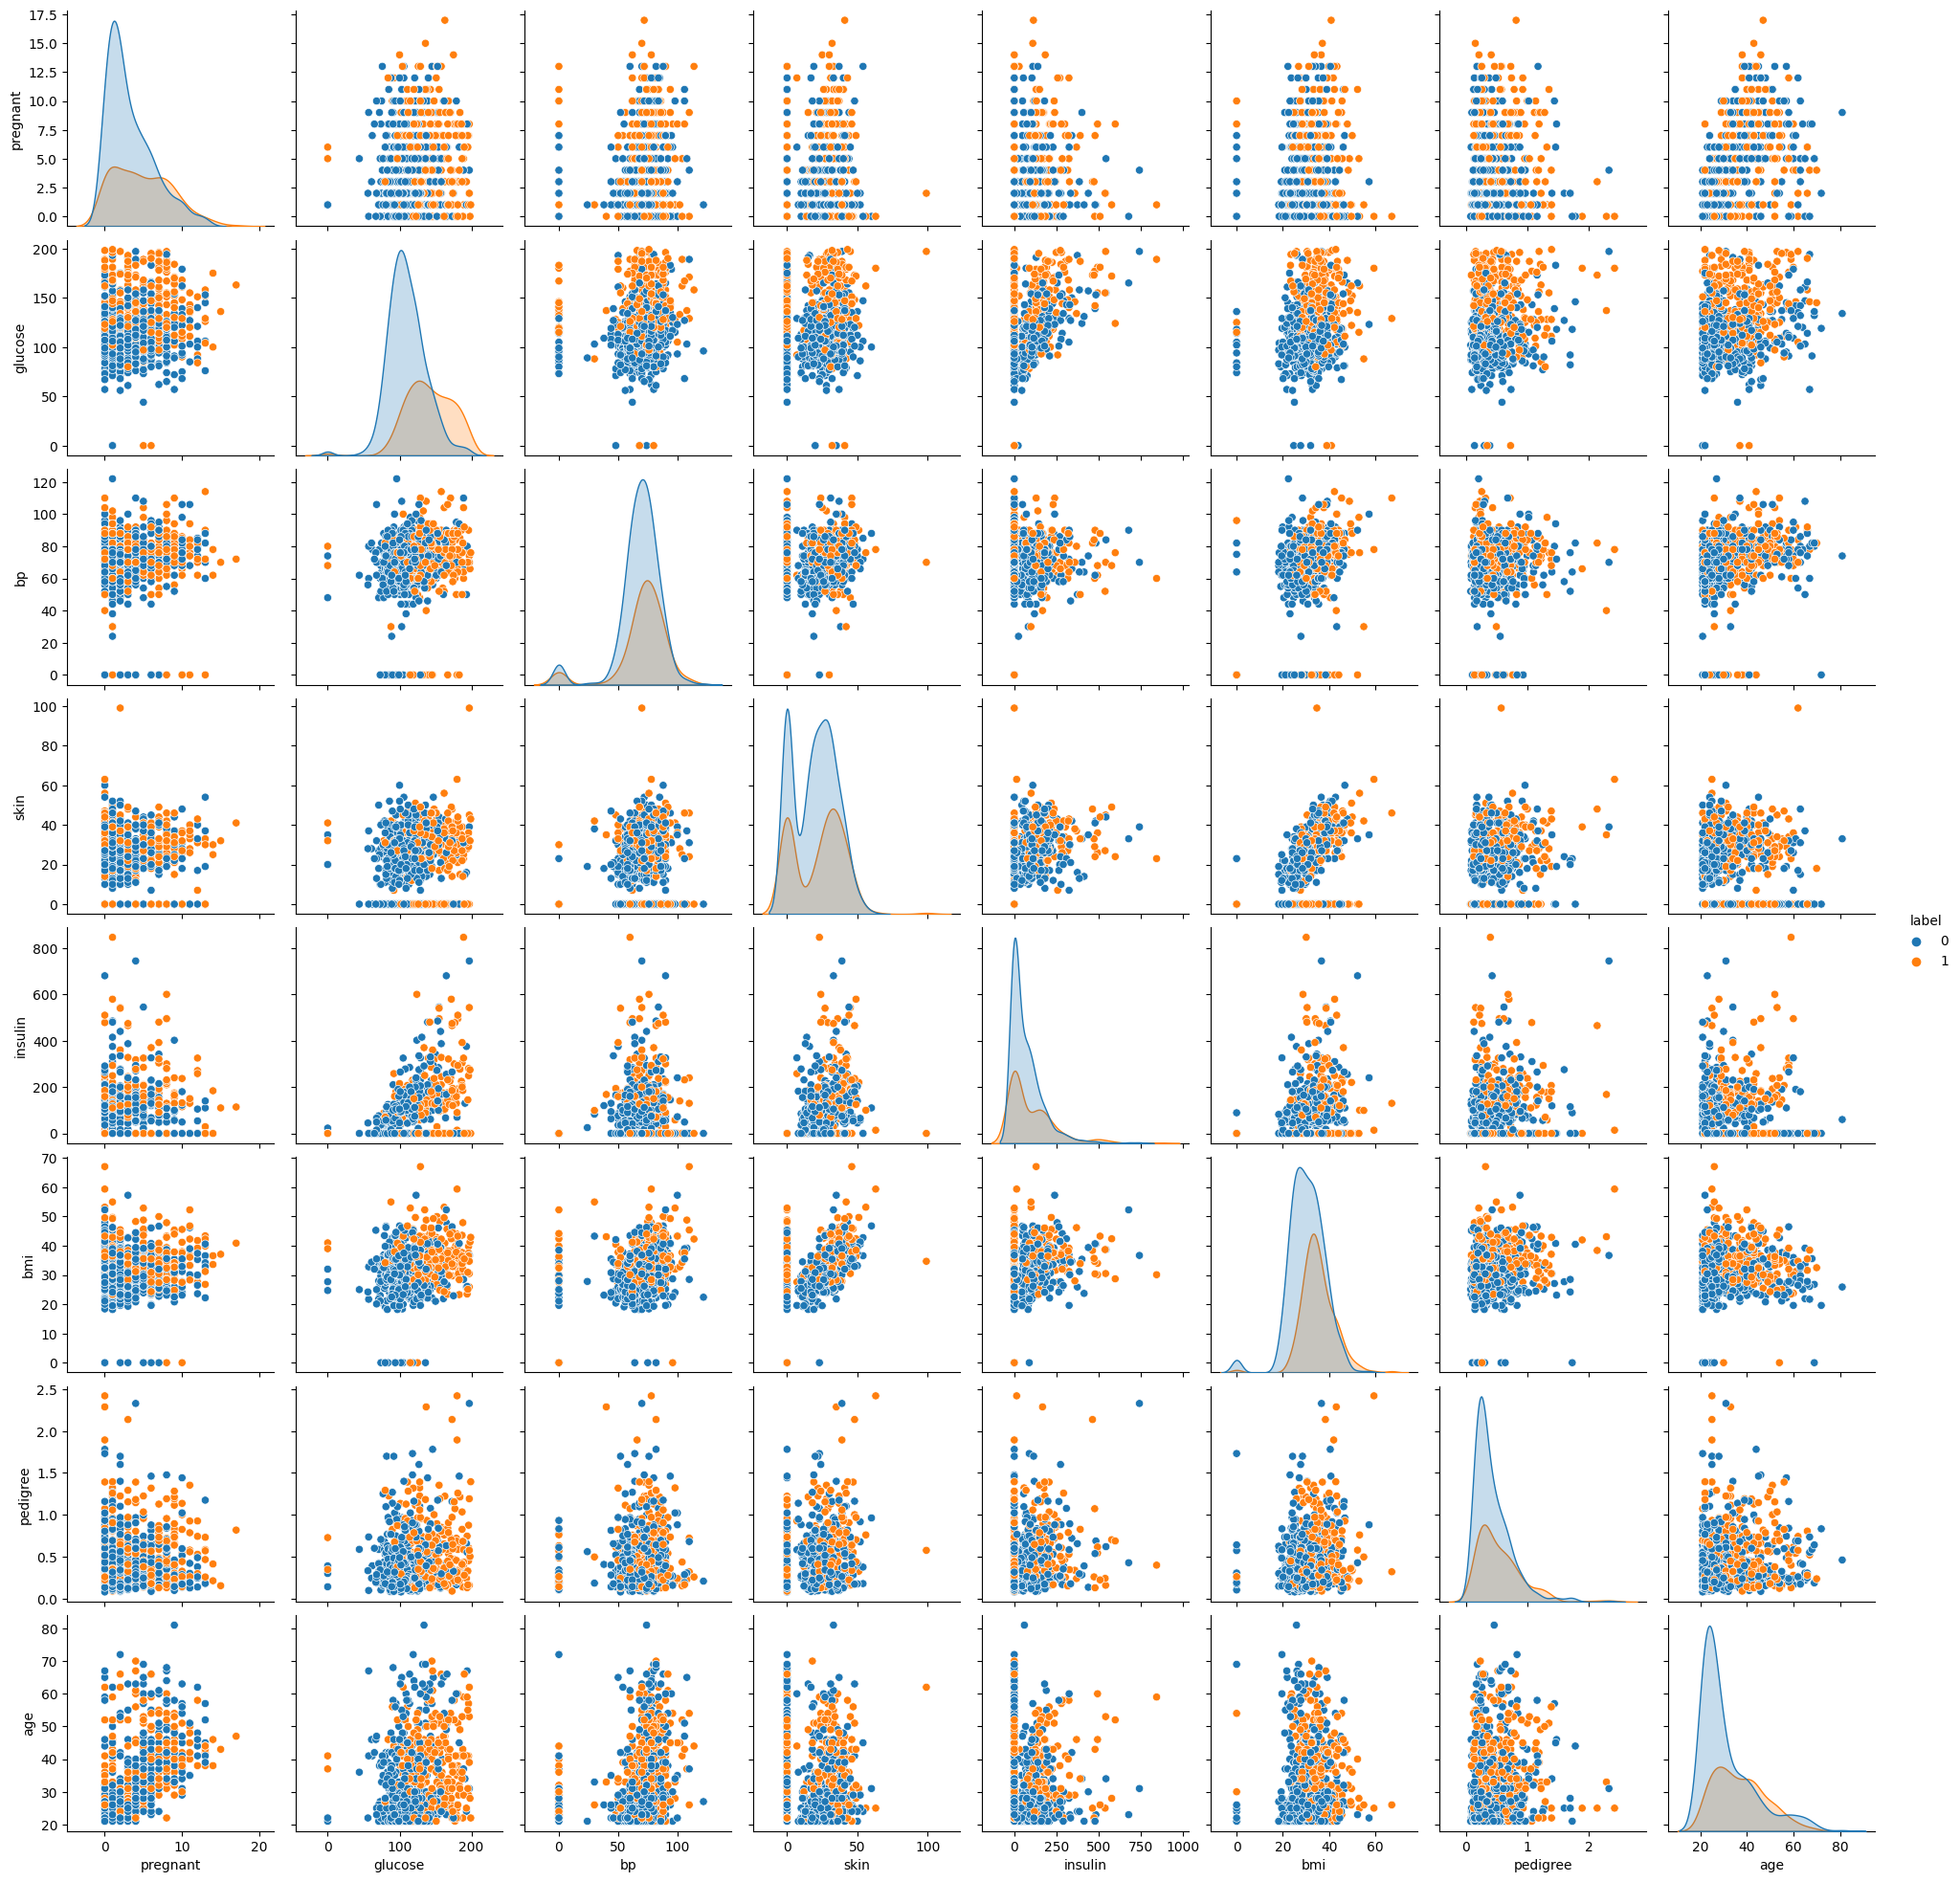

In [ ]:
sns.pairplot(diabetes, hue = 'label')

En este caso, nos vamos a centrar sobretodo en las figuras que están en la diagonal. En ellas podemos observar cuál es la distribución de los datos para cada una de las clases. Para cualquier problema de clasificación, y en particular para los modelos de Naïve Bayes, esperamos que estas distribuciones sean visualmente distintas.  Por ejemplo, en el caso de la variable glucosa encontramos que la media poblacional es distinta cuando label = 0 y label = 1. Teniendo inclusive valores de glucosa más altos en el para pacientes con diabetes (label = 1), lo cual tiene sentido desde el punto de vista médico.

In [ ]:
diabetes.columns

X = diabetes.drop('label', axis=1)
y = diabetes.label

X.head()

pregnant  glucose  bp  skin  insulin   bmi  pedigree  age
0         6      148  72    35        0  33.6     0.627   50
1         1       85  66    29        0  26.6     0.351   31
2         8      183  64     0        0  23.3     0.672   32
3         1       89  66    23       94  28.1     0.167   21
4         0      137  40    35      168  43.1     2.288   33

De cara al proceso de modelado, separamos nuestras variables predictoras de la variable objetivo.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.30,
    random_state=1234)

En este paso dividiremos nuestro dataset en train (entrenamiento) y test para comprobar la robustez del modelo. Para el caso de test nos quedaremos con un 30% de los datos iniciales.

In [ ]:
# Inicializar el modelo usando los parámetros predeterminados
nb_model = GaussianNB(var_smoothing = 1e-9)

# Ajutar el modelo a los datos

nb_model.fit(X_train, y_train)

GaussianNB()

Definimos el modelo con los parámetros por defecto, puedes verificar en la documentación de **sklearn** que a nivel de función este modelo no tiene muchos parámetros. Lo que es una de las grandes **ventajas** al momento de plantear un modelo con Naïve Bayes.

Recuerda que este modelo solo se basa en el cálculo de las probabilidades condicionales para hacer la estimación de la clase.

Finalmente, para este caso hacemos la predicción y posterior evaluación de las métricas usando el accuracy_score().

In [ ]:
# Predecir para el dataset de Test

y_pred = nb_model.predict(X_test)

# Información del modelo
# ==============================================================================
print("Precisión del modelo:", accuracy_score(y_test, y_pred, normalize=True))

Precisión del modelo: 0.7575757575757576


Podemos observar, si bien es cierto que este modelo no mejora los resultados obtenidos con la Regresión Logística que las métricas obtenidas son bastante buenas de cara a un modelo base. Además, como comentamos anteriormente su fácil implementación y limitado uso de parámetros lo convierten en una herramienta bastante útil para crear modelos de clasificación.

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.88      0.82       147
           1       0.72      0.55      0.62        84

    accuracy                           0.76       231
   macro avg       0.75      0.71      0.72       231
weighted avg       0.75      0.76      0.75       231

